### Demo: Logistic Regression

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score
%matplotlib inline

In [34]:
def logit_func(x):
    return np.log(x/(1-x))

def sigmoid_func(x):
    return 1. / (1 + np.exp(-x))

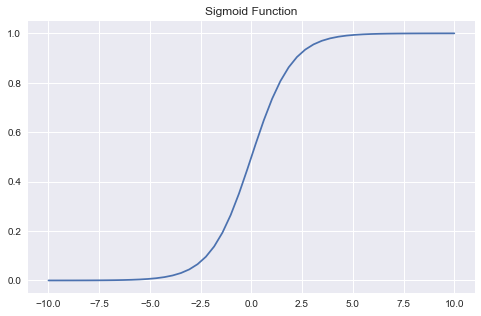

In [35]:
x = np.linspace(-10, 10, 50)
y = sigmoid_func(x)
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.show()

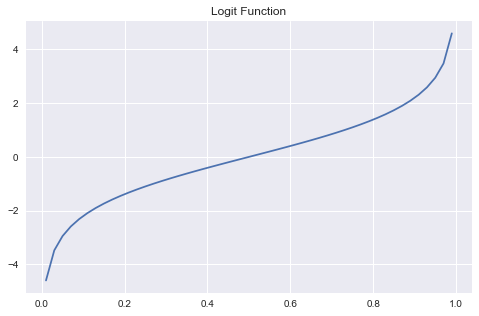

In [36]:
x = np.linspace(0.01, 0.99, 50)
y = logit_func(x)
plt.figure(figsize=(8,5))
plt.plot(x, y)
plt.title("Logit Function")
plt.show()

### Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.


The equation can be rearranged into the **logistic function**:

$$p = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

#### College Admissions 

The college admissions data indicates whether a given student was admitted into a college based on his gre score, gpa, and the rank of his previous institution (rank 1 refers to a top tier institution)

In [37]:
college = pd.read_csv('data/collegeadmissions.csv')
college.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


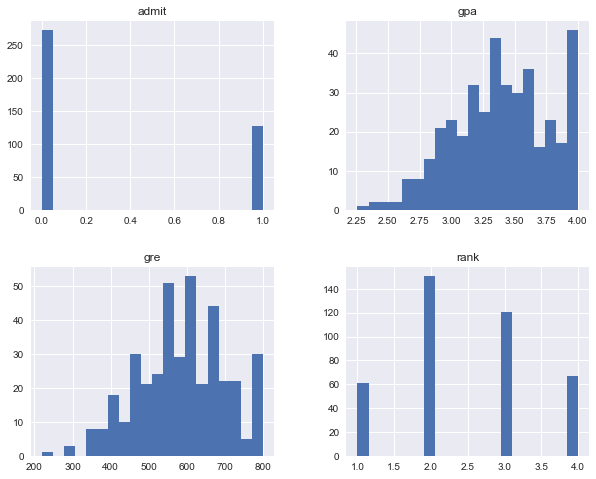

In [38]:
college.hist(figsize=(10,8), bins = 20)
plt.show()

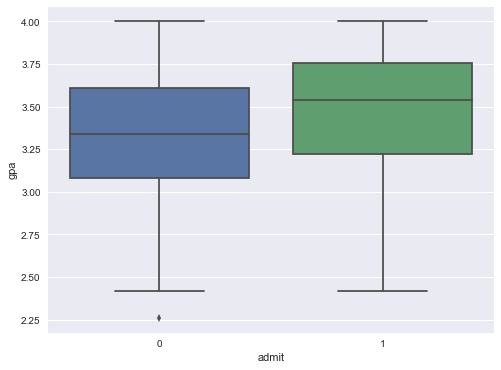

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot("admit", "gpa", data=college)
plt.show()

In [40]:
college = college.join(pd.get_dummies(college['rank'], drop_first=True, prefix="rank"))
college.head()

,admit,gre,gpa,rank,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,1,0
1,1,660,3.67,3,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,4,0,0,1
4,0,520,2.93,4,0,0,1


### Statsmodels Formula API

#### Single variable logistic regression 

In [41]:
lm_single = smf.logit(formula = "admit ~ gre", data=college).fit()

Optimization terminated successfully.
         Current function value: 0.607570
         Iterations 5


In [42]:
lm_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Jun 2017   Pseudo R-squ.:                 0.02784
Time:                        13:15:29   Log-Likelihood:                -243.03
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 0.0001907
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.9013      0.606     -4.787      0.000        -4.089    -1.714
gre            0.0036      0.001      3.633      0.000         0.002     0.006
==============================================================================
"""

In [43]:
lm_single.params

Intercept   -2.901344
gre          0.003582
dtype: float64

**Recall:** $$p = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In [44]:
np.exp(lm_single.params[0] + lm_single.params[1]*500) / (1 + np.exp(lm_single.params[0] + lm_single.params[1]*500))

0.24782644055631872

In [45]:
lm_single.predict(pd.DataFrame({'gre': [500]}))

array([ 0.24782644])

#### Multiple variable logistic regression 

In [46]:
lm_multi = smf.logit(formula = "admit ~ gre + gpa + C(rank)", data=college).fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [47]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 23 Jun 2017   Pseudo R-squ.:                 0.08292
Time:                        13:17:44   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000        -6.224    -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033        -1.296    -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000        -2.017    -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000        -2.370    -0.733
gre              0.0023      0.001      2.070      0.038         0.000     0.004
gpa              0.8040      0.332      2.423      0.015         0.154     1.454
================================================================================
"""

Selecting the first row to demonstrate the predictions

In [48]:
college.iloc[0]

admit       0.00
gre       380.00
gpa         3.61
rank        3.00
rank_2      0.00
rank_3      1.00
rank_4      0.00
Name: 0, dtype: float64

In [49]:
lm_multi.predict(college.iloc[0])

array([ 0.17262654])

In [50]:
lm_multi.params

Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

**Recall:** $$p = \frac{e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p}} {1 + e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p}}$$

In [51]:
np.exp(lm_multi.params[0] + lm_multi.params[2]*1 + lm_multi.params[4] * 380 + lm_multi.params[5] * 3.61) /\
(1 + np.exp(lm_multi.params[0] + lm_multi.params[2]*1 + lm_multi.params[4] * 380 + lm_multi.params[5] * 3.61))

0.17262654088815371

In [52]:
# You can convert these into odds using numpy.exp()
print(np.exp(lm_multi.params))

Intercept       0.018500
C(rank)[T.2]    0.508931
C(rank)[T.3]    0.261792
C(rank)[T.4]    0.211938
gre             1.002267
gpa             2.234545
dtype: float64


### Sklearn 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Note that Sklearn's implementation includes a regularization parameter C where smaller values specify stronger regularization.

In [53]:
model = LogisticRegression(C=1e9)
factors = ['gre', 'gpa', "rank_2", "rank_3", "rank_4"]
model.fit(college[factors], college['admit'])

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
print(model.coef_)
print(model.intercept_)

[[ 0.00225514  0.8017655  -0.67456784 -1.33708167 -1.5502974 ]]
[-3.97765653]


Observe that the regularization serves to shrink the coefficient parameters

In [55]:
model2 = LogisticRegression()
model2.fit(college[factors], college['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
print(model2.coef_)
print(model2.intercept_)

[[ 0.00181821  0.24353857 -0.6058383  -1.1749244  -1.3783985 ]]
[-1.87278844]


#### Accuracy Metrics

In [60]:
predicted = model.predict(college[factors])
print(accuracy_score(college['admit'], predicted))

0.71


In [61]:
predicted_proba = model2.predict_proba(college[factors])
threshold = 0.5
predicted_classes = (predicted_proba > threshold).astype(int)[:,1]
print(accuracy_score(college['admit'], predicted_classes))

0.7075


### Confusion Matrices

The ROC curve plots the false positive rate and true positive rate for various threshold values. It is useful for comparing models and determining where the decision line should exist for the data. 

In [62]:
college['admit'].value_counts()

0    273
1    127
Name: admit, dtype: int64

In [63]:
print(confusion_matrix(college['admit'], predicted))

[[254  19]
 [ 97  30]]


- Top Left: True Negatives 
- Top Right False Positives 
- Bottom Left: False Negatives 
- Bottom Right: True Positives 

In [64]:
tn, fp, fn, tp = 254, 19, 97, 30
accuracy = (tp + tn) / float(tp + tn + fp + fn)
recall = tp/float(tp + fn)
specificity = fp/float(fp + tn)
precision = tp/float(tp + fp)
print(accuracy, recall, specificity, precision)

(0.71, 0.23622047244094488, 0.0695970695970696, 0.6122448979591837)


In [65]:
print(recall_score(college['admit'], predicted))
print(precision_score(college['admit'], predicted))

0.236220472441
0.612244897959


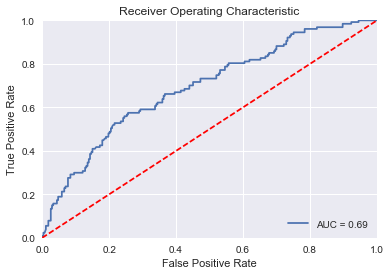

In [31]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(college[factors])
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(college['admit'], preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [66]:
roc_auc_score(college['admit'], model.predict_proba(college[factors])[:,1])

0.69266822416428719

### Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions